Epoch 1/50
1/1 [==============================] - 0s 481ms/step - loss: 6.2364 - accuracy: 0.5000 - val_loss: 5.1643 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: 4.7711 - accuracy: 0.5000 - val_loss: 3.7826 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 21ms/step - loss: 3.2975 - accuracy: 0.5000 - val_loss: 2.4116 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: 1.8490 - accuracy: 0.5000 - val_loss: 1.2026 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 21ms/step - loss: 0.7219 - accuracy: 0.7500 - val_loss: 1.0928 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.7422 - accuracy: 0.7500 - val_loss: 1.8508 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 19ms/step - loss: 1.3980 - accuracy: 0.5000 - val_loss: 2.3548 - val_accuracy: 0.5000
Epoch 8/50
1/1 [==========

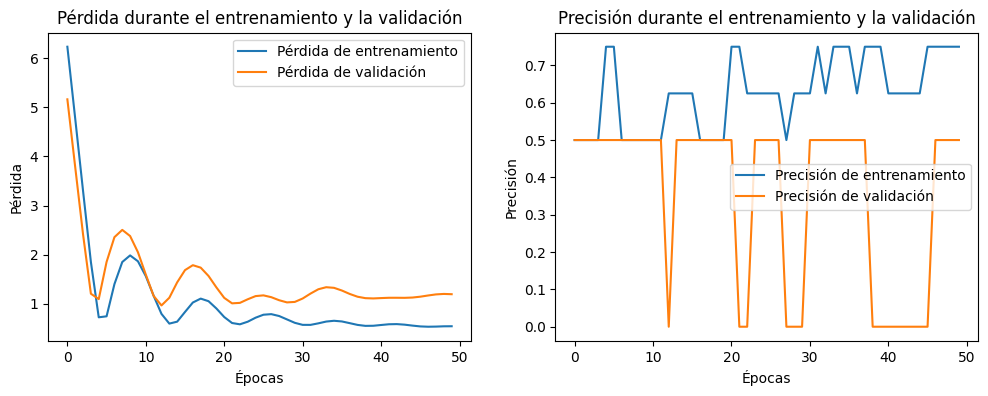

1/1 [==============================] - 0s 16ms/step - loss: 1.1927 - accuracy: 0.5000
Pérdida en el conjunto de prueba: 1.1926896572113037
Precisión en el conjunto de prueba: 0.5
1/1 [==============================] - 0s 47ms/step
[[0.5357414]
 [0.8281745]]


In [1]:
# EntrenamientoRedNeuronal.ipynb

# Importar librerías necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
datos = pd.read_csv('../data/ventas.csv')

# Preprocesamiento de datos
X = datos.drop('producto_comprado', axis=1).values
y = datos['producto_comprado'].values

# Dividir datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir un modelo secuencial
modelo = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo y guardar el historial de entrenamiento
historial = modelo.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Visualizar el historial de entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento y la validación')

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(historial.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento y la validación')

plt.show()

# Evaluar el modelo en el conjunto de prueba
pérdida, precisión = modelo.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {pérdida}')
print(f'Precisión en el conjunto de prueba: {precisión}')

# Hacer predicciones
predicciones = modelo.predict(X_test)
print(predicciones)